## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

In [11]:
import sys
sys.executable

'/usr/bin/python3'

In [12]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

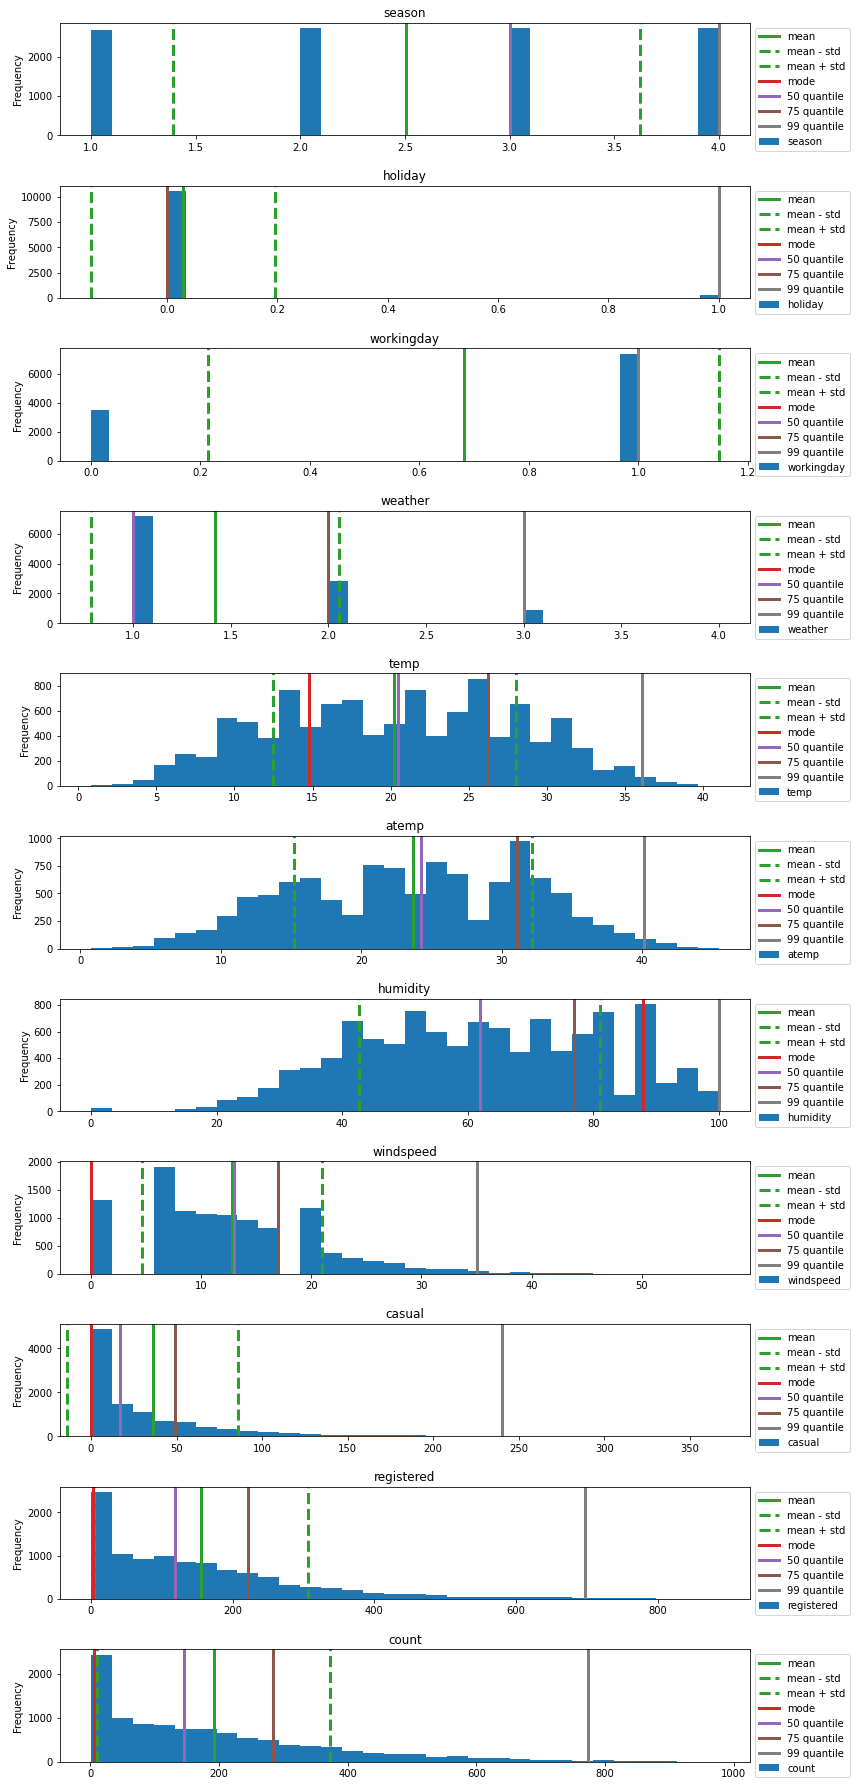

In [13]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, axs = plt.subplots(df.shape[1], 1, figsize=(12, 25))

for col, ax in zip(df.columns, axs.flat):
    working = df[col]
    working.plot.hist(ax=ax, title=col, bins=30)

    mean = working.mean()
    std = working.std()
    mode = working.mode()[0]

    q50, q75, q99 = working.quantile([.5, .75, .99])

    ax.axvline(mean, label="mean", lw=3, color=colors[2])
    ax.axvline(mean - std, label="mean - std", lw=3, color=colors[2], ls='--')
    ax.axvline(mean + std, label="mean + std", lw=3, color=colors[2], ls='--')
    
    ax.axvline(mode, label="mode", lw=3, color=colors[3])
    
    ax.axvline(q50, label="50 quantile", lw=3, color=colors[4])
    ax.axvline(q75, label="75 quantile", lw=3, color=colors[5])
    ax.axvline(q99, label="99 quantile", lw=3, color=colors[7])
    
    ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

plt.tight_layout()

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [14]:
stat_list = []

for col in df.columns:
    working = df[col]

    mean = working.mean()
    var = working.var()
    mode = working.mode()[0]

    q25, q50, q75, q99 = working.quantile([.25, .5, .75, .99])

    iqr = q75 - q25
    left, right = mean - 1.5 * iqr, mean + iqr * 1.5

    count = working.count()
    iqr_count = working[(left <= working) & (working <= right)].count()

    stat_list.append({
        "mean": mean,
        "var": var,
        "mode": mode,
        "q25": q25,
        "q50": q50,
        "q75": q75,
        "q99": q99,
        "count": count,
        "iqr_count": iqr_count,
        "outliers_percent": (count - iqr_count) / count
    })


pd.DataFrame(stat_list, index=df.columns)

,mean,var,mode,q25,q50,q75,q99,count,iqr_count,outliers_percent
season,2.506614,1.245845,4.00,2.0000,3.000,4.0000,4.0000,10886,10886,0.000000
holiday,0.028569,0.027755,0.00,0.0000,0.000,0.0000,1.0000,10886,0,1.000000
workingday,0.680875,0.217304,1.00,0.0000,1.000,1.0000,1.0000,10886,10886,0.000000
weather,1.418427,0.401751,1.00,1.0000,1.000,2.0000,3.0000,10886,10026,0.079001
temp,20.230860,60.708872,14.76,13.9400,20.500,26.2400,36.0800,10886,10870,0.001470
atemp,23.655084,71.818856,31.06,16.6650,24.240,31.0600,40.1500,10886,10882,0.000367
humidity,61.886460,370.371306,88.00,47.0000,62.000,77.0000,100.0000,10886,10846,0.003674
windspeed,12.799395,66.659670,0.00,7.0015,12.998,16.9979,35.0008,10886,10272,0.056403
casual,36.021955,2496.049219,0.00,4.0000,17.000,49.0000,240.1500,10886,9964,0.084696
registered,155.552177,22812.789514,3.00,36.0000,118.000,222.0000,697.0000,10886,10233,0.059985


**Season**  
Сезоный проведения заездов или гонок распределены равномерно по четырем значениям. Никаких выброчов не набоюдается.

**Holiday**  
Скорее всего показывает, был ли проведен заезд в празлники. Можно сказать, что эта метрика имеет распределение бернулли. Никаких выбросов не наблюдается (И откуда ?)).

**Workingday**  
Аналогично Holiday, но характеризует проведение заезда в будни или выходные. Распределение бернулли, с другим параметром нежели Holiday. Никаких выбросов не наблюдается.

**Weather**  
Надо полагать, что метрика описывает качество погоды, закодированное в трех значениях. Распределение напоминает экспоненциальное.

**Temp**  
Скорее всего описывает температуру. Распредделение +- симметричное, но на нормальное не похоже из-за слишиком высокой (а в некоторых случаях низкой) частоты значений в середине того, что могло быть колоколом. Есть выбросы по 99му персентилю.

**Atemp**  
Смысл этой метрики мне не понятен, но скорее всего это тоже что-то про температуру или связано с ней (это так же видно на матрице корреляций в конце отчета). Распределение, как и в предыдущем случае, какое-то квази-псевдо-нормальное.

**Humidity**  
Влажность воздуха. Тоже довольно странное распределение, возможно там сидит несколько кластеров. Никаких выбросов не наблюдается.

**Windspeed**  
Скорость ветра. Либо природе принципиально не чтобы ветер двигался с некоторыми скоростями, то ли в данных какая-то аномалия. Есть выбросы по 99му персентилю.

**Casual**  
Никаких идей, что эта метрика может значить. Распределение похоже на экспоненциальное. Выбросов не видно (на графике по крайней мере).

**Restricted**  
Скорее всего это количество зарегистрированных участников. Распределение похоже на экспоненциальное. Видны выбросы по 99му персентилю.

**Count**  
Скорее всего это количество участников, которые приняли участие в заезде. Распределение похоже на экспоненциальное. Видны выбросы по 99му персентилю.



### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [15]:
df.apply(lambda x: [x.skew(), x.kurt()]).rename({0: "skewness", 1: "kurtosis"})

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
skewness,-0.007076,5.660517,-0.776163,1.243484,0.003691,-0.102560,-0.086335,0.588767,2.495748,1.524805,1.242066
kurtosis,-1.355661,30.046975,-1.397828,0.395533,-0.914530,-0.850076,-0.759818,0.630133,7.551629,2.626081,1.300093


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [29]:
df.columns[df.var().argmax()]

'count'

Метрика с самой большой дисперсией — count

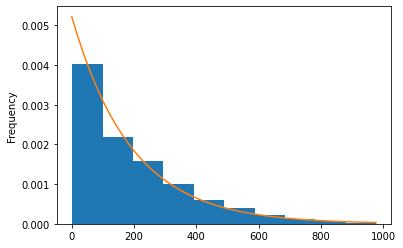

In [23]:
sample = df["count"]
sample_mean = sample.mean()
sample_dist = stats.expon(scale=sample_mean)

x = np.linspace(0, sample.max())
df["count"].plot.hist(density=True)
plt.plot(x, sample_dist.pdf(x))


Проверим нулевую гипотезу, о том, что выборка пораждена экспоненциальным распределением.

In [18]:
stats.kstest(sample, sample_dist.cdf)[1] < .05

True

Нулевую гипотезу опровергнуть не удалсь, поэтому считаем распределение экспоненциалбным. Построим доверительный интервал.

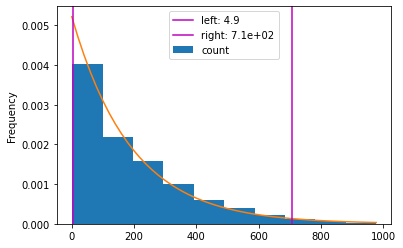

In [19]:
left, right = sample_dist.interval(.95)

df["count"].plot.hist(density=True)
plt.plot(x, sample_dist.pdf(x))
plt.axvline(left, c="m", label=f"left: {left:.2}")
plt.axvline(right, c="m", label=f"right: {right:.2}")
plt.legend()

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [20]:
### YOUR CODE HERE ###
stat_list = []
for col in df.columns:
    metrics = df[col]
    s = metrics.std()
    e = metrics.mean()
    count = metrics.count()
    filterd_count = metrics[(e - 3 * s <= metrics) & (metrics <= e + 3 * s)].count()
    stat_list.append({
        "metrix": col,
        "total": count,
        "anomalies": count - filterd_count,
        "percent": (count - filterd_count) / count,
    })

pd.DataFrame.from_records(stat_list).set_index("metrix")

,total,anomalies,percent
metrix,,,
season,10886,0,0.000000
holiday,10886,311,0.028569
workingday,10886,0,0.000000
weather,10886,1,0.000092
temp,10886,0,0.000000
atemp,10886,0,0.000000
humidity,10886,22,0.002021
windspeed,10886,67,0.006155
casual,10886,292,0.026823


Больше всего аномалий в метрике casual.

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

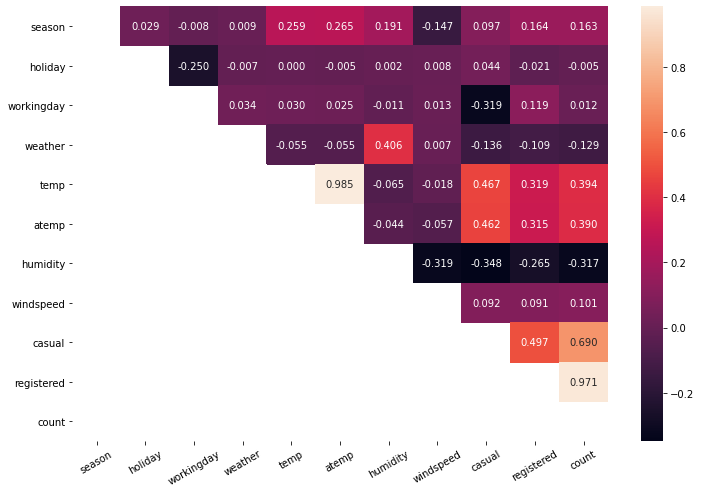

In [38]:
corr = df.corr()
plt.figure(figsize=(12, 8))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)).T
grid = sns.heatmap(corr, mask=mask, annot=True, fmt=".3f")
grid.set_xticklabels(grid.get_xticklabels(), rotation=30);


Сразу бросаются в глаза очень высокие показатели корреляции у пар temp-atemp и registered-count, что вполне логично: temp и atemp характеризуют погоду, в то время как registered и count ожидаемо связаны (чем больше человек зарегистрировались, тем больше в среднем придут).

Довольно сильная связь у показателей weather и humidity, видимо общущение влажности как-то зашито в показателе погоды.

temp влияет на registered и еще сильгей на count. Есть люди, которым не все равно, какя температура за окном, чтобы кататься.